In [21]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

In [25]:
al = 1
be = 4
n = 116
x = 17

al_2 = al + x
be_2 = be + n - x

p = np.linspace(0, 1, 100)

likelihood = binom.pmf(x, n, p)
likelihood_norm = likelihood / np.trapz(likelihood, p)

prior = beta(al, be)

posterior = beta(al_2, be_2)

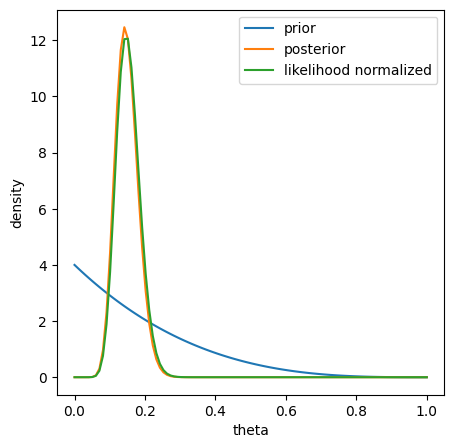

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(p, prior.pdf(p), label='prior')
ax.plot(p, posterior.pdf(p), label='posterior')
ax.plot(p, likelihood_norm, label='likelihood normalized')
ax.set_xlabel('theta')
ax.set_ylabel('density')
ax.legend()
plt.show()

In [27]:
posterior.cdf(0.1)

0.053094376993042654

In [40]:
posterior_cdf = np.cumsum(posterior.pdf(p))
#We need to find closest value to 0.025 and 0.975, instead of equality to them.
#So we take posterior_cdf - <value> ideally equal to 0, or we take minimum value for positive values or maximum value for negatives(closest to 0).
#and find index for this value of theta and find theta
lower = p[np.argmin(np.abs(posterior_cdf - 0.025))]
upper = p[np.argmin(np.abs(posterior_cdf - 0.975))]
lower, upper

(0.05050505050505051, 0.08080808080808081)